# Klasse B versterkers

In [1]:
from cursusdef import *

## Indeling vermogenversterkers

######  Overzicht
 


In {numref}`vermogenversterkersB` hernemen we een overzicht van de verschillende versterkers die we bespreken in de leerlijn analoge elektronica.

:::{list-table} Indeling van de vermogenversterkers
:header-rows: 1
:name: vermogenversterkersB

* - 
  - laagfrequent of breedband
  - hoogfrequent of resonant
* - 1 transistor in de vermogentrap
  - Klasse A
  - Klasse C <BR> Klasse F <BR>Klasse E
* - 2 of meer  transistors in de vermogentrap
  - **Klasse B**  <BR> Klasse G
  - Klasse D
:::

## Basisschema

### Schema voor DC werking

###### Basisschema van de klasse B versterker voor DC werking

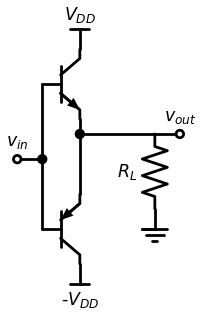

In [6]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='down', l=1.5)
    indot=Dot()
    Line(d='down', l=1.4)
    T2 = BjtPnp(  d='right')
    
    Vdd(xy=T1.collector,  l=0.75,  label='$V_{DD}$')
    Line(xy=indot.start, d='left', l=0.5)
    Dot(open=True, label='$v_{in}$')
    Line(d='down',xy=T1.emitter, l=0.3)
    outdot=Dot()
    Line(d='down',xy=outdot.start,toy=T2.emitter)
    Vss(xy=T2.collector,label='-$V_{DD}$')
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down',l=1.5, label='$R_L$')
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')

Het is belangrijk in dit schema de verschillende bouwblokken te herkennen. {numref}`Bfig1anot` toont deze bouwblokken. We hebben natuurlijk in de eerste plaats de belasting $R_L$. Daarnaast zien we (in de groene box) zowel het pull-up netwerk als het pull-down netwerk aangeduid.

###### Basisschema van de klasse B versterker voor DC werking

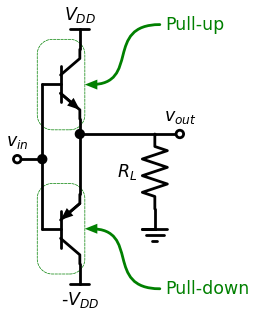

In [5]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='down', l=1.5)
    indot=Dot()
    Line(d='down', l=1.4)
    T2 = BjtPnp(  d='right')
    
    Vdd(xy=T1.collector,  l=0.75,  label='$V_{DD}$')
    Line(xy=indot.start, d='left', l=0.5)
    Dot(open=True, label='$v_{in}$')
    Line(d='down',xy=T1.emitter, l=0.3)
    outdot=Dot()
    Line(d='down',xy=outdot.start,toy=T2.emitter)
    Vss(xy=T2.collector,label='-$V_{DD}$')
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down',l=1.5, label='$R_L$')
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')

    pullup = EncircleBox([T1],padx=.1).linestyle('--').linewidth(0.5).color('green')
    pulldown = EncircleBox([T2],padx=.1).linestyle('--').linewidth(0.5).color('green')
    Annotate(th1=0).at(pullup.E).delta(dx=1.5, dy=1.2).label('Pull-up').color('green')
    Annotate(th1=0).at(pulldown.E).delta(dx=1.5, dy=-1.2).label('Pull-down').color('green')

### Schema voor AC werking

###### Basisschema van de klasse B versterker voor AC werking

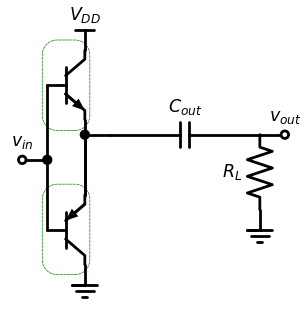

In [10]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='down', l=1.5)
    indot=Dot()
    Line(d='down', l=1.4)
    T2 = BjtPnp(  d='right')
    
    Vdd(xy=T1.collector,  l=0.75,  label='$V_{DD}$')
    Line(xy=indot.start, d='left', l=0.5)
    Dot(open=True, label='$v_{in}$')
    Line(d='down',xy=T1.emitter, l=0.3)
    outdot=Dot()
    Line(d='down',xy=outdot.start,toy=T2.emitter)
    Ground(xy=T2.collector)
    
    Line(xy=outdot.start,  d='right', l=0.5)
    C1 = Capacitor(d='right', label='$C_{out}$')
    R = Resistor(d='down',l=1.5, label='$R_L$')
    Ground()
    Line(d='down',xy=outdot.start,toy=T2.emitter)
    
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')

    pullup = EncircleBox([T1],padx=.1).linestyle('--').linewidth(0.5).color('green')
    pulldown = EncircleBox([T2],padx=.1).linestyle('--').linewidth(0.5).color('green')

###### SPICE code

```{literalinclude} ./simul/classB1.sp
:language: spice
:name: listing1
:caption: basis Klasse B circuit
```

In [11]:
spicelisting("simul/classB1.sp")

Klasse B versterker
*
* SUPPLY VOLTAGES
VPOS 8 0 DC	+15V
VNEG 9 0 DC	-15V
*
*  input source
VS1 1 0	DC 0 SIN(0V 5VPEAK 10KHZ)
*
*  PUSH-PULL TRANSISTOR OUTPUT STAGE
Q1 8 1 2 QNPN
Q2 9 1 2 QPNP
*
* Load resistance
RL1 2 0	100
*
* DEVICE MODELS
.model QNPN	NPN(BF=50)
.model QPNP	PNP(BF=50)

De simulatie (zie {numref}`Bfig2`) van de spice code{numref}`listing1`  geeft duidelijk de dode zone aan bij de nuldoorgang van de spanning. In {numref}`Bfig2B` bekijken we deze nuldoorgang in meer detail.

###### klasse B: Stromen en spanning als functie van de tijd

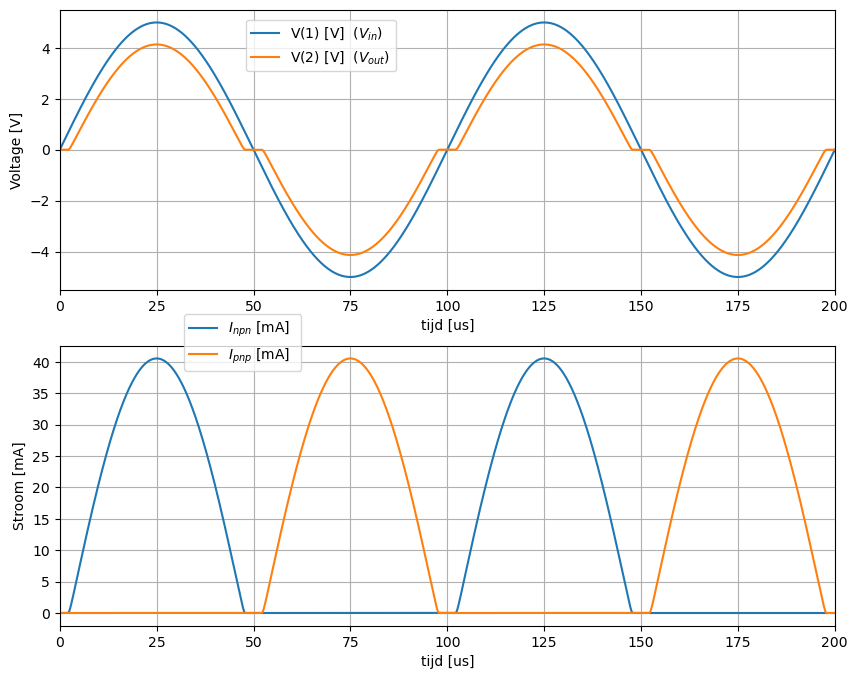

In [31]:
circuit=SpiceParser(path='simul/classB1.sp').build_circuit()     # CHECK DISTORTION WITH FOURIER SERIES ANALYSIS    ==> .FOUR 10KHZ V(12) 
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{out}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]');

###### In de buurt van de nuldoorgang

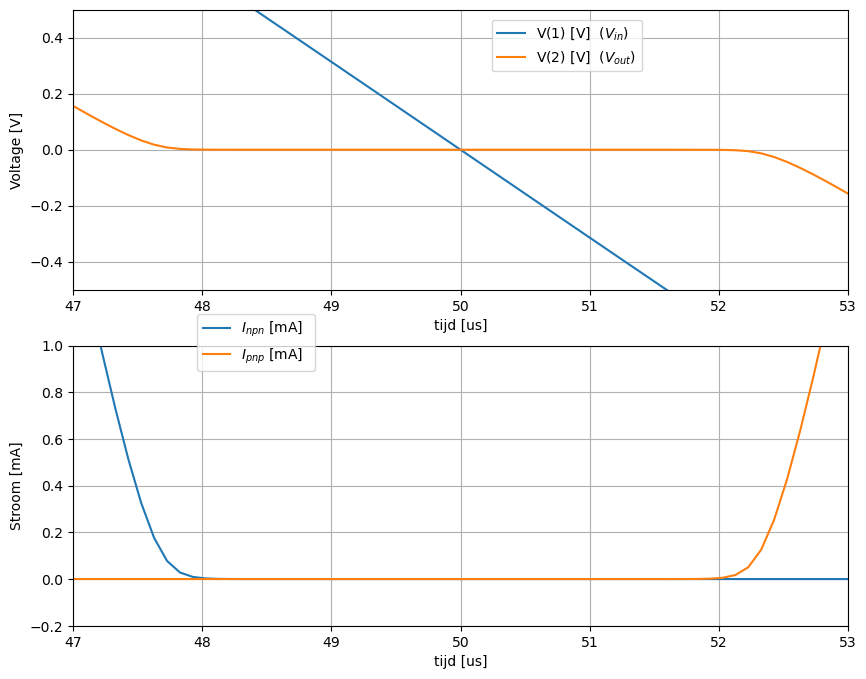

In [30]:
figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{out}$)')
ax[0].legend( loc=(0.54,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(47,53)
ax[0].set_ylim(-0.5,0.5)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(47,53)
ax[1].set_ylim(-0.2,1)
ax[1].set_ylabel('Stroom [mA]');

{numref}`Bfig2C` toont de stroom door als functie van de spanning over de transistor voor de npn transistor. Voor de pnp transistor bekomen we dezelfde grafiek.

###### Stroom als functie van de spanning

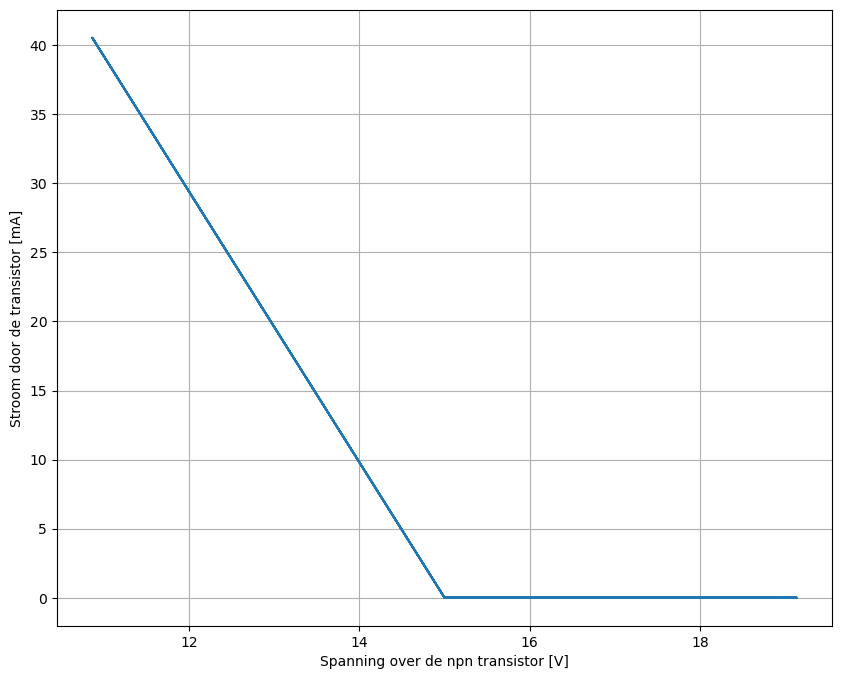

In [32]:
figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis.nodes['8']-analysis.nodes['2'],-analysis.branches['vpos']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de npn transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]');

## Gebruik van de voorinstelspanning

### Weerstand als voorinstelspanning

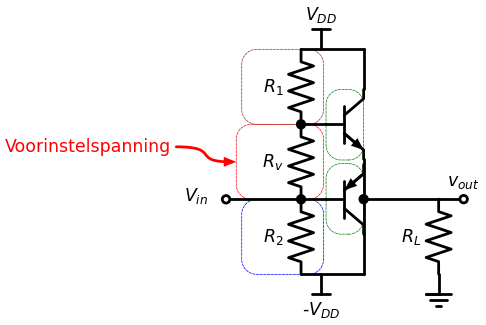

In [63]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=0.5)
    PullUpIn=Dot()
    Rv=Resistor(d='down', label='$R_v$', l=1.5)
    indot=Dot()
    Line(d='right', l=0.5)
    T2 = BjtPnp( d='right')
    r1 = Resistor(xy=PullUpIn.start, d='up', label='$R_1$',l=1.5)
    Line(d='right', l=0.4)
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    r2=Resistor(xy=indot.start, d='down', label='$R_2$',l=1.5)
    Line(d='right', l=0.4)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    
    Line(xy=indot.start, d='left', l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])
    Line(d='down',xy=T1.emitter, l=0.8)
    outdot=Dot()
    Line(d='down',toy=T2.emitter)
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    
    EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    Voorinstelspanning = EncircleBox([Rv],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([r1],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([r2],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('blue')
    
    Annotate(th1=0).at(Voorinstelspanning.W).delta(dx=-1.2, dy=0.3).label('Voorinstelspanning').color('red')

### Diodes als voorinstelspanning

###### Basisschema met voorinstelspanning

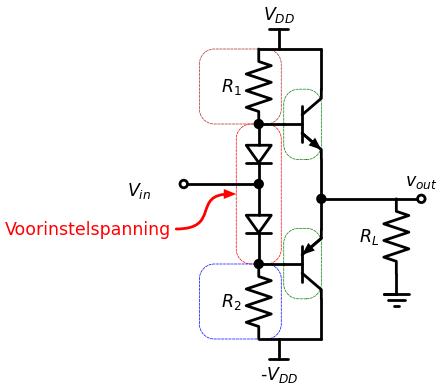

In [57]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=0.5)
    PullUpIn=Dot()
    dv1=Diode(d='down', l=1.2)
    indot=Dot()
    dv2=Diode(d='down', l=1.6)
    PullDownIn=Dot()
    Line(d='right', l=0.5)
    T2 = BjtPnp( d='right')
    r1 = Resistor(xy=PullUpIn.start, d='up', label='$R_1$',l=1.5)
    Line(d='right', l=0.4)
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    r2=Resistor(xy=PullDownIn.start, d='down', label='$R_2$',l=1.5)
    Line(d='right', l=0.4)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    
    Line(xy=indot.start, d='left', l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.9,-.4])
    Line(d='down',xy=T1.emitter, l=0.8)
    outdot=Dot()
    Line(d='down',toy=T2.emitter)
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    
    EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    Voorinstelspanning = EncircleBox([dv1,dv2],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([r1],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([r2],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('blue')
    
    Annotate(th1=0).at(Voorinstelspanning.W).delta(dx=-1.2, dy=-0.7).label('Voorinstelspanning').color('red')

### Transistor als voorinstelspanning

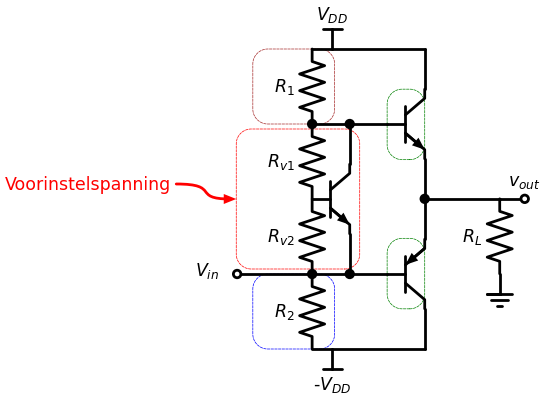

In [73]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=1.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=1.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    r1 = Resistor(xy=PullUpIn.start, d='up', label='$R_1$',l=1.5)
    Line(d='right', l=0.4)
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    r2=Resistor(xy=indot.start, d='down', label='$R_2$',l=1.5)
    Line(d='right', l=0.4)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    
    Line(xy=indot.start, d='left', l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])
    Line(d='down',xy=T1.emitter, l=0.8)
    outdot=Dot()
    Line(d='down',toy=T2.emitter)
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    
    EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    Voorinstelspanning = EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([r1],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('brown')
    EncircleBox([r2],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('blue')
    
    Annotate(th1=0).at(Voorinstelspanning.W).delta(dx=-1.2, dy=0.3).label('Voorinstelspanning').color('red')

Hieronder tonen we de spice listing van de klasse B versterker waarbij we een voorinstelspanning voorzien tussen de  basissen van de npn en de pnp transistor. Deze voorinstelspanning is hier uitgevoerd door diodes. in {numref}`Bfig2dio` merken we hierbij op dat dit tot gevolg heeft dat er toch een stroom blijft lopen door de transistor die niet in geleiding is. Dit noemen we de klasse AB werking van deze klasseB versterker.

###### SPICE code met voorinstelspanning

```{literalinclude} ./simul/classB2.sp
:language: spice
:name: listing2
:caption: Klasse B circuit met voorinstelspanning
```

In [24]:
spicelisting("simul/classB2.sp")

Klasse B versterker
*
* SUPPLY VOLTAGES
VPOS 8 0 DC +15V
VNEG 9 0 DC -15V
*
VS2 10 0 DC 0 SIN(0V 5VPEAK 10KHZ)
*
D1  13 10	DNOM
RB1 13 8	10K
Q11 8 13 12 QNPN
*
D2  10 14   DNOM
RB2 14 9    10K
Q12 9 14 12 QPNP
*
RL2 12 0 100
*
* DEVICE MODELS
.model	QNPN	NPN(BF=50)
.model	QPNP	PNP(BF=50)
.model	DNOM	D()



###### Stromen en spanningen als een functie van de tijd

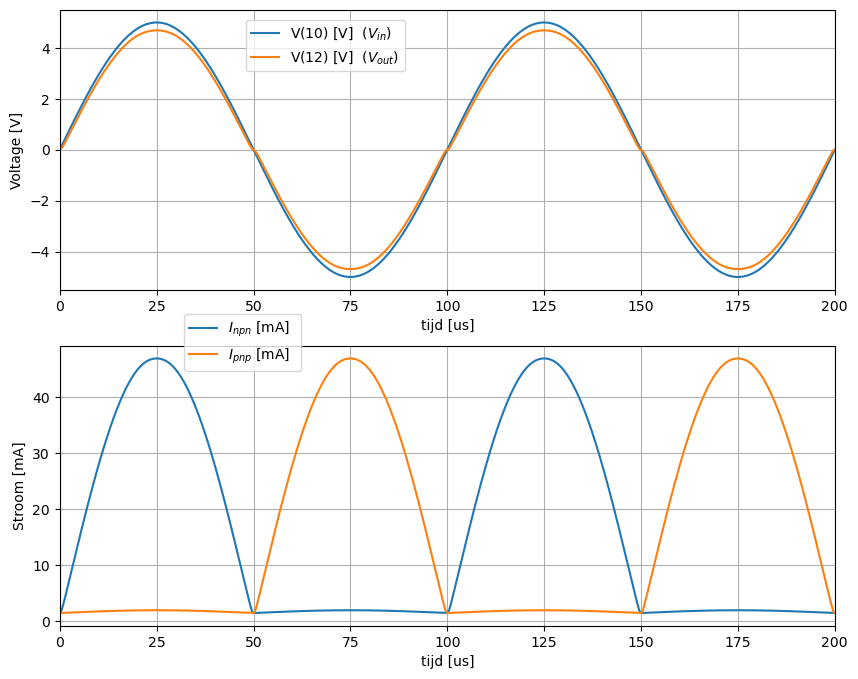

In [33]:
circuit=SpiceParser(path='simul/classB2.sp').build_circuit()  
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['10'],label='V(10) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['12'],label='V(12) [V]  ($V_{out}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

In de grafiek ({numref}`Bfig2dioss`) wordt dit nog duidelijker.

###### Stroom als functie van de spanning

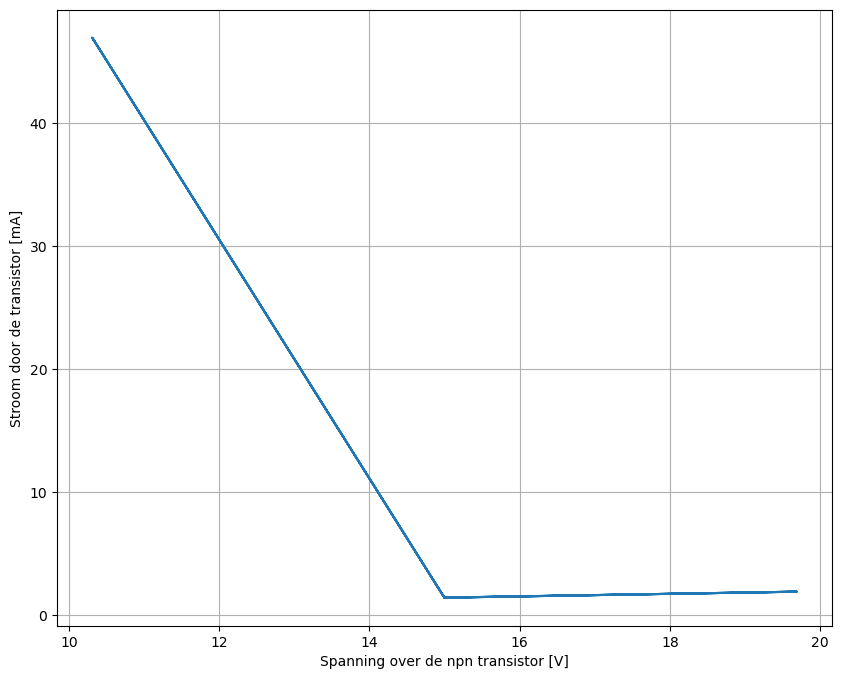

In [34]:
figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis.nodes['8']-analysis.nodes['12'],-analysis.branches['vpos']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de npn transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]')
plt.show()

We kunnen ook proberen de dode zone weg te werken aan de hand van feedback, zoals in het onderstaande schema aan de hand van een opamp. Op het eerste zicht lijkt dat te lukken, als we de simulatie in {numref}`Bopmapsim` bekijken. De $V_{in}$ en $V_{out}$ liggen zo goed als volledig op elkaar dat we het verschil niet merken. Enkel als we heel erg inzoemen, zoals in {numref}`Bopmapsimz` lijkt er een klein verschil te zijn langs de nuldoorgang. Laat je hierbij echter niet vangen. Deze simualtie is gedaan met een ideale OpAmp, warvan de stijsnelheid niet realistisch is. Wanneer we diezelfde simulatie hernemen met een realistische OpAmp, zie onder, blijft dit bijna ideale gedrag niet behouden.

###### SPICE code met OPAMP feedback

```{literalinclude} ./simul/classB4.sp
:language: spice
:name: listing3
:caption: SPICE code met OPAMP feedback
```

In [3]:
print(SpiceParser(path='simul/classB4.sp').build_circuit())

.title Klasse B versterker  PUSH-PULL PLACED IN OPAMP FEEDBACK LOOP
VPOS 8 0 DC +15V
VNEG 9 0 DC -15V
VS3 20 0 DC 0 SIN(0V 5VPEAK 10KHZ)
Q21 8 23 22 QNPN
Q22 9 23 22 QPNP
RL3 22 0 100
XOpAmp 20 22 8 9 23 opamp
.model QNPN NPN (BF=50)
.model QPNP PNP (BF=50)
.model DNOM D ()



###### Stromen en spanningen bij terugkoppeling

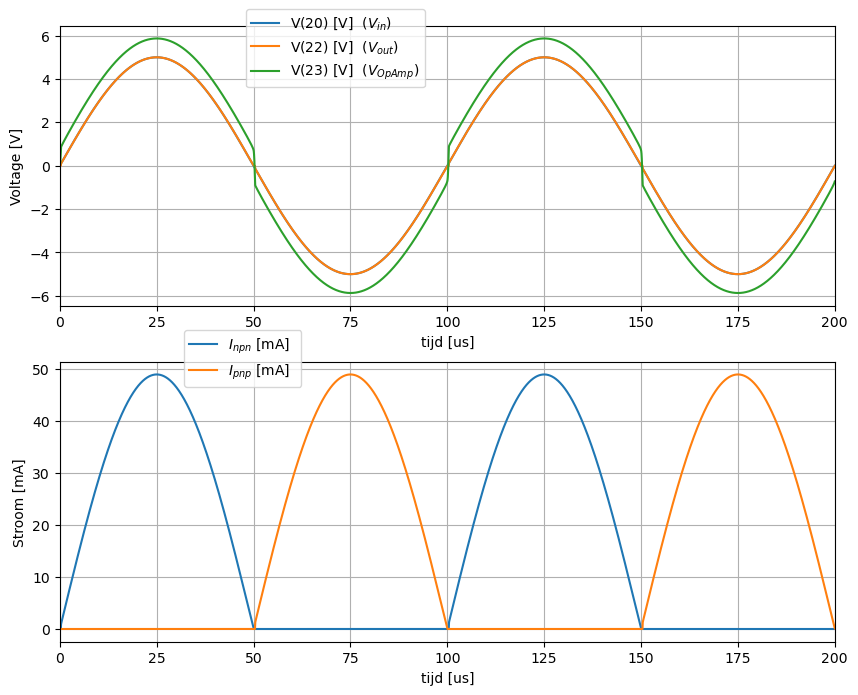

In [35]:
circuit=SpiceParser(path='simul/classB4.sp').build_circuit()  
circuit.include('libraries/opamp/BasicOpamp.cir')
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

###### Nuldoorgang van de stromen en de spanningen

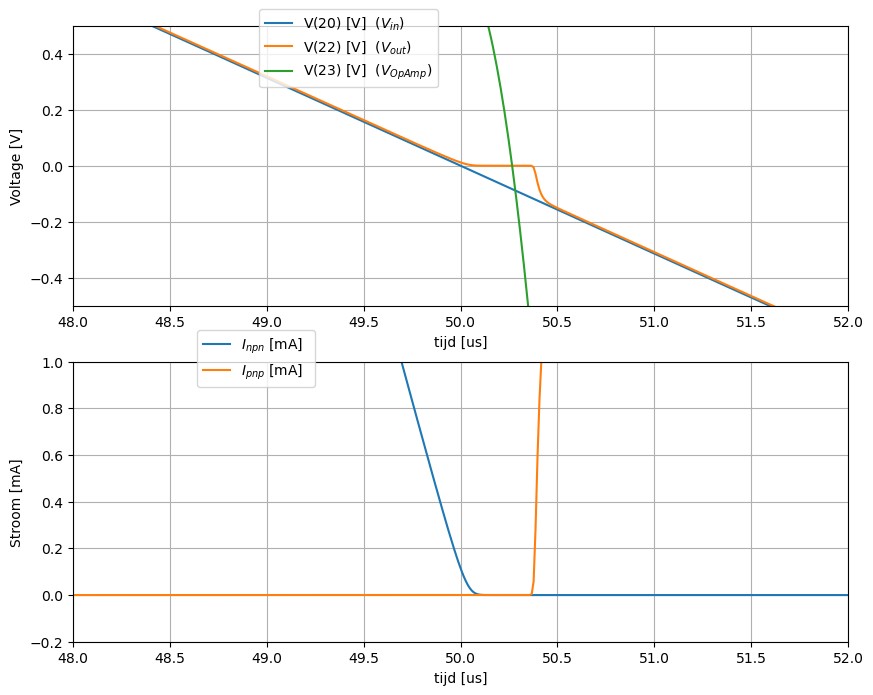

In [39]:
figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(48,52)
ax[0].set_ylim(-0.5,0.5)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(48,52)
ax[1].set_ylim(-0.2,1)
ax[1].set_ylabel('Stroom [mA]')
plt.show()


###### Stroom door de transistor als functie van de spanning over

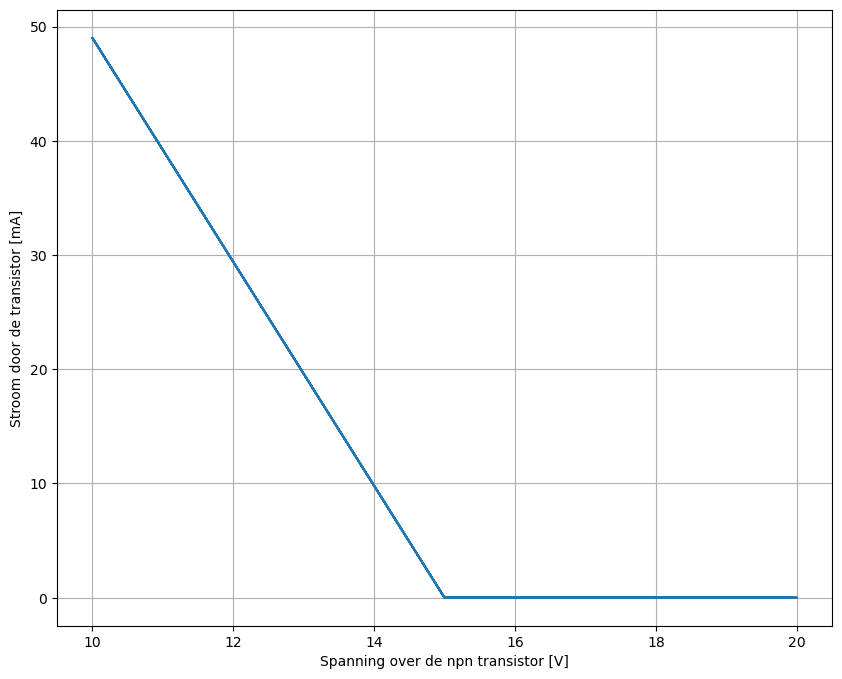

In [40]:
figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis.nodes['8']-analysis.nodes['22'],-analysis.branches['vpos']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de npn transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]')
plt.show()

###### Ideale OpAmp

```{literalinclude} ./simul/classB5.sp
:language: spice
:name: listing4
:caption: SPICE code met OPAMP feedback
```

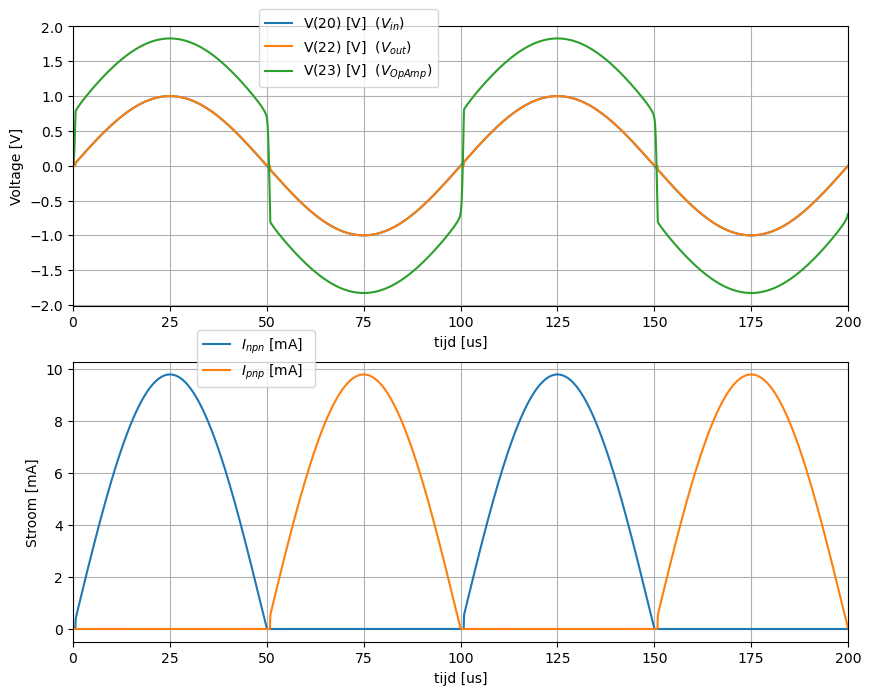

In [41]:
circuit=SpiceParser(path='simul/classB5.sp').build_circuit()  
circuit.include('libraries/opamp/BasicOpamp.cir')
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

Echter, wanneer we een realistisch model van een opamp invoeren, zoals de [LMV981-N](https://www.ti.com/product/LMV981-N) van Texas Instruments, zien we een heel ander gedrag in de dode zone.

###### Realistische OpAmp

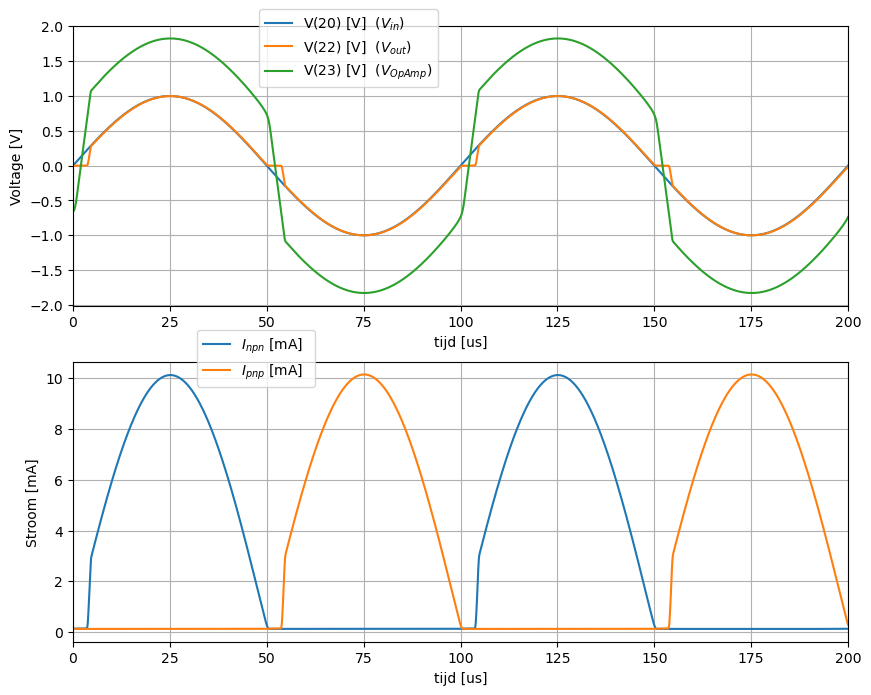

In [42]:
circuit=SpiceParser(path='simul/classB5.sp').build_circuit()  
circuit.include('libraries/opamp/LMV981.cir')   # Dit is een opamp met lage voedingsspanning. Beter een opamp kiezen met aangepast voedingsspaaningsbereik.
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

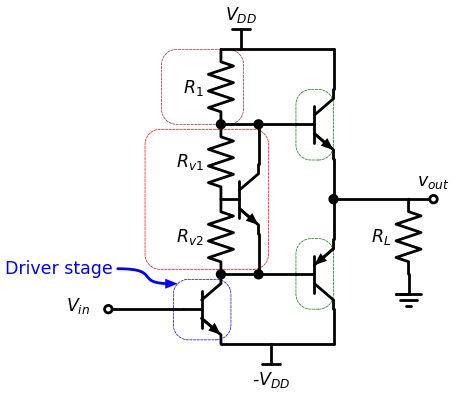

In [79]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base,  d='left', l=1.5)
    PullUpIn=Dot()
    Rv1=Resistor(d='down', label='$R_{v1}$', l=1.5)
    Tv = BjtNpn(d='right')
    Rv2=Resistor(d='down', xy=Tv.base,label='$R_{v2}$', l=1.5)
    indot=Dot()
    Line(d='right', tox=T1.base)
    T2 = BjtPnp( d='right')
    Line(d='up',xy=Tv.collector, toy=PullUpIn.start)
    Dot()
    Line(d='down', xy=Tv.emitter, toy=indot.start)
    Dot()
    r1 = Resistor(xy=PullUpIn.start, d='up', label='$R_1$',l=1.5)
    Line(d='right', l=0.4)
    Vdd(label='$V_{DD}$')
    Line(d='right', tox=T1.collector)
    Line(d='down', toy=T1.collector)
    Td=BjtNpn(d='right',xy=indot.start).anchor('collector')
    Line(d='right', xy= Td.emitter,l=1)
    Vss(label='-$V_{DD}$')
    Line(d='right', tox=T2.collector)
    Line(d='up', toy=T2.collector)
    
    Line(xy=Td.base, d='left', l=1.5)
    Dot(open=True).label('$V_{in}$', ofst=[-0.6,-.2])
    Line(d='down',xy=T1.emitter, l=0.8)
    outdot=Dot()
    Line(d='down',toy=T2.emitter)
    
    Line(xy=outdot.start,  d='right', l=1.5)
    R = Resistor(d='down', label='$R_L$', l=1.5)
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    
    EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([Tv,Rv1,Rv2],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('red')
    EncircleBox([r1],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('brown')
    driverbox=EncircleBox([Td],padx=0.2,pady=-0.1).linestyle('--').linewidth(0.5).color('blue')
    
    Annotate(th1=0).at(driverbox.NW).delta(dx=-1.2, dy=0.3).label('Driver stage').color('blue')

###### 2 opeenvolgende drive transistors

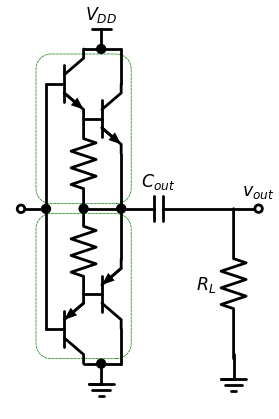

In [25]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='down', l=2.5)
    indot=Dot()
    Line(d='down', l=2.4)
    T2 = BjtPnp(d='right')
    Line(xy=indot.start, d='left', l=0.5)
    Dot(open=True)
    T11 = BjtNpn(d='right',xy=T1.emitter)
    r11 = Resistor(d='down',xy=T1.emitter,l=1.8)
    outdot=Dot()
    Line(d='down',xy=T11.emitter,toy=outdot.start)
    Dot()
    Line( d='up',xy=T11.collector,toy=T1.collector)
    Line(d='left',l=0.4)
    Dot()
    Vdd(label='$V_{DD}$')
    Line(d='left',tox=T1.collector)
    
    r21 = Resistor(d='down',xy=outdot.start,toy=T2.emitter)
    T21 = BjtPnp( d='right')
    Line(d='up',xy=T21.emitter,toy=outdot.start)
    Line(d='down',xy=T21.collector,toy=T2.collector)
    Line(d='left',l=0.4)
    Dot()
    Ground()
    Line(d='left',tox=T2.collector)
    
    C1 = Capacitor(d='right',xy=outdot.start, label='$C_{out}$')
    R = Resistor( d='down', label='$R_L$')
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True,label='$v_{out}$')
    Ground(xy=R.end)
    Line(d='up',toy=T2.collector)
    EncircleBox([T1,T11,r11],pady=-0.1).linestyle('--').linewidth(0.5).color('green')
    EncircleBox([T2,T21,r21],pady=-0.1).linestyle('--').linewidth(0.5).color('green')